In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_parquet("../data/MsTweetsV2/TweetNormalizationHashtagSkip/train.parquet")

In [3]:
train["fold"] = "train"
train

,clean_text,label_str,date,label,fold
37868,Szijjártó (szef MSZ) najważniejsze wyzwania - ...,ko,2015-02-16 15:02:27+00:00,1,train
76169,"Popieram Adam Bodnara na funkcję RPO! Mój, lud...",ko,2015-07-24 09:57:26+00:00,1,train
76326,Posłanka Zwiercan przyznała się jeszcze będąc ...,ko,2016-04-14 09:56:55+00:00,1,train
90989,"Andrzej Adamczyk o programie ""Mieszkanie plus""...",konfederacja,2016-05-20 10:13:02+00:00,0,train
12782,"To może debata, Panie Prezesie? O Europie, Pol...",ko,2016-10-04 14:54:04+00:00,1,train
...,...,...,...,...,...
36918,To już w tę sobotę pokażemy nasze ! Od 12:00 z...,ko,2023-09-06 16:10:27+00:00,1,train
28814,Konstruktywne spotkanie z @user odpowiadającym...,pis,2023-09-06 16:11:01+00:00,2,train
59227,Ostatni dzień w Chorwacji spędziłem w Puli ora...,ko,2023-09-06 16:12:28+00:00,1,train
20411,"Gdyby wyborcy Lewicy przerzucili głosy na KO, ...",ko,2023-09-06 16:13:22+00:00,1,train


<Axes: xlabel='label_str', ylabel='Count'>

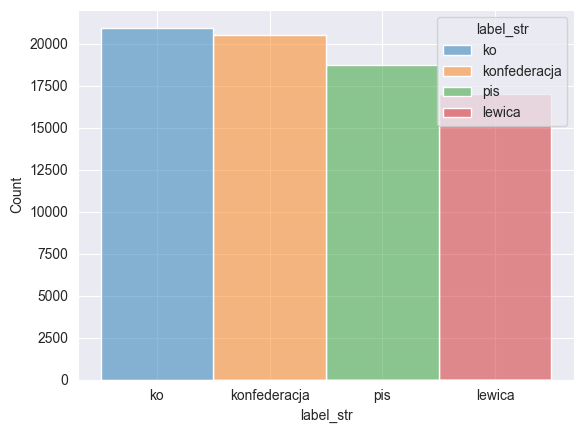

In [4]:
sns.histplot(train, x="label_str", hue="label_str")

In [5]:
test = pd.read_parquet("../data/MsTweetsV2/TweetNormalizationHashtagSkip/test.parquet")

In [6]:
test["fold"] = "test"
test

,clean_text,label_str,date,label,fold
31545,„Ukraińskie zboże: ukraińscy posłowie mają zak...,pis,2023-09-06 16:17:58+00:00,2,test
57001,Średnio dzieci i młodzież na konsultację psych...,lewica,2023-09-06 16:18:21+00:00,3,test
14228,".@user to taki rolnik, który głównie uprawia p...",ko,2023-09-06 16:18:43+00:00,1,test
11139,Damian mówi wprost - to najważniejsze wybory. ...,lewica,2023-09-06 16:23:58+00:00,3,test
120819,Prezesa NBP i Radę Polityki trudno uznać za wł...,lewica,2023-09-06 16:25:05+00:00,3,test
...,...,...,...,...,...
114579,W CBOS na pewno gorące dyskusje - ile dać PiSo...,ko,2023-10-06 21:36:47+00:00,1,test
120595,"Wytłumaczcie mi, proszę, dlaczego w sprawie ws...",ko,2023-10-06 21:45:11+00:00,1,test
111959,Ta naukowczyni nie zamyka się w laboratorium. ...,konfederacja,2023-10-06 21:59:00+00:00,0,test
105637,.@user | Iranka Narges Mohammadi laureatką Pok...,pis,2023-10-06 22:00:02+00:00,2,test


<Axes: xlabel='label_str', ylabel='Count'>

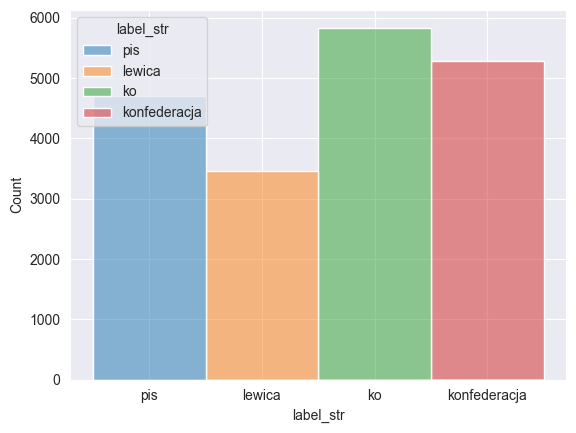

In [7]:
sns.histplot(test, x="label_str", hue="label_str")

<Axes: xlabel='date', ylabel='Count'>

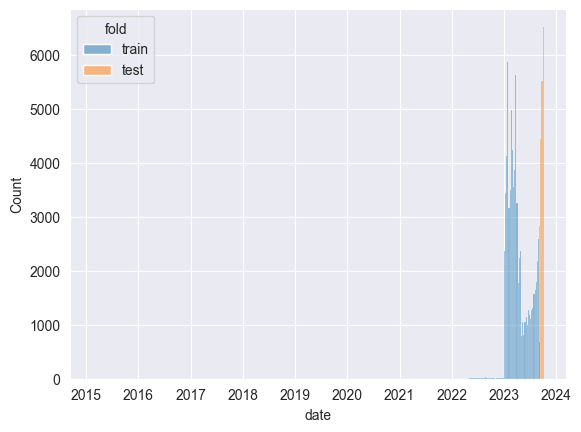

In [8]:
sns.histplot(pd.concat([train, test]), x="date", hue="fold")

In [12]:
from transformers import AutoConfig
from transformers import AutoTokenizer
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

MODEL_PATH = "dkleczek/bert-base-polish-cased-v1"

config = AutoConfig.from_pretrained(MODEL_PATH)
max_token_len = config.max_position_embeddings
max_token_len

512

In [13]:
tokenizer: BertTokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

In [17]:
train_toks = tokenizer.batch_encode_plus(
    train["clean_text"].tolist(),
    add_special_tokens=True,
    padding=True,
    return_tensors="pt"
)

In [21]:
train_toks["input_ids"].shape[1]    # max tokens in train

176

In [24]:
test_toks = tokenizer.batch_encode_plus(
    test["clean_text"].tolist(),
    add_special_tokens=True,
    padding=True,
    return_tensors="pt"
)

In [25]:
test_toks["input_ids"].shape[1]    # max tokens in test

147

### Raw

In [27]:
raw = pd.read_parquet("../datasets_raw/rp_tweets/tweets.parquet")

In [28]:
raw.head(15)

,__class__,__module__,id,id_str,url,date,lang,rawContent,replyCount,retweetCount,...,source,sourceUrl,sourceLabel,media,_type,author_user_id,author_username,mentioned_users_ids,mentioned_users_names,quotedTweet__present
0,Tweet,twscrape.models,1709663946133668045,1709663946133668045,https://twitter.com/1972tomek/status/170966394...,2023-10-04 20:17:03+00:00,pl,"Ustawa o restrukturyzacji naprawczej, którą wp...",2,1,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,625810721,1972tomek,[],[],True
1,Tweet,twscrape.models,1709629401908777067,1709629401908777067,https://twitter.com/DnaRynkow/status/170962940...,2023-10-04 17:59:47+00:00,pl,Palikot zaproponował jak chce oddać kasę wierz...,167,241,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,1042017897416204288,DnaRynkow,[],[],False
2,Tweet,twscrape.models,1709632727614431489,1709632727614431489,https://twitter.com/1972tomek/status/170963272...,2023-10-04 18:13:00+00:00,pl,Prawo rodzinne zniszczyło instytucję rodziny.,16,8,...,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,625810721,1972tomek,[],[],True
3,Tweet,twscrape.models,1709439433030631786,1709439433030631786,https://twitter.com/KonradNiznik_/status/17094...,2023-10-04 05:24:55+00:00,pl,42% młodych małżonków decyduje się na rozdziel...,54,15,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{""photos"": [{""url"": ""https://pbs.twimg.com/med...",snscrape.modules.twitter.Tweet,1860948558,KonradNiznik_,[],[],False
4,Tweet,twscrape.models,1709560066246901985,1709560066246901985,https://twitter.com/1972tomek/status/170956006...,2023-10-04 13:24:16+00:00,pl,"Przeciwko prywatyzacji są zawsze ci, którzy ch...",3,5,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,625810721,1972tomek,[],[],True
5,Tweet,twscrape.models,1709478296864317754,1709478296864317754,https://twitter.com/RGwiazdowski/status/170947...,2023-10-04 07:59:21+00:00,pl,To już wiecie dlaczego nie można oddać lasów b...,20,51,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,899954538,RGwiazdowski,[],[],True
6,Tweet,twscrape.models,1709545727683162549,1709545727683162549,https://twitter.com/1972tomek/status/170954572...,2023-10-04 12:27:17+00:00,pl,"Przyznacie, że to dość zabawne, że wadliwe szc...",39,26,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,625810721,1972tomek,[],[],False
7,Tweet,twscrape.models,1709545507972932007,1709545507972932007,https://twitter.com/1972tomek/status/170954550...,2023-10-04 12:26:25+00:00,pl,Wreszcie premier Morawiecki reaguje.,18,0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{""photos"": [], ""videos"": [], ""animated"": []}",snscrape.modules.twitter.Tweet,625810721,1972tomek,[],[],True
8,Tweet,twscrape.models,1709521916988453319,1709521916988453319,https://twitter.com/DiabolRokita/status/170952...,2023-10-04 10:52:41+00:00,pl,Musimy chronić nasze dzieci!\nW Państwie Polsk...,73,41,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{""photos"": [{""url"": ""https://pbs.twimg.com/med...",snscrape.modules.twitter.Tweet,1620683656497926148

In [29]:
users_raw = pd.read_parquet("../datasets_raw/rp_tweets/users.parquet")

In [30]:
users_raw["affiliation_id"].unique()

array(['konfederacja', 'bezpartyjni', 'ko', 'pis', 'lewica'], dtype=object)

In [31]:
raw["text_len"] = raw["rawContent"].apply(lambda s: len(s))

<Axes: xlabel='text_len', ylabel='Count'>

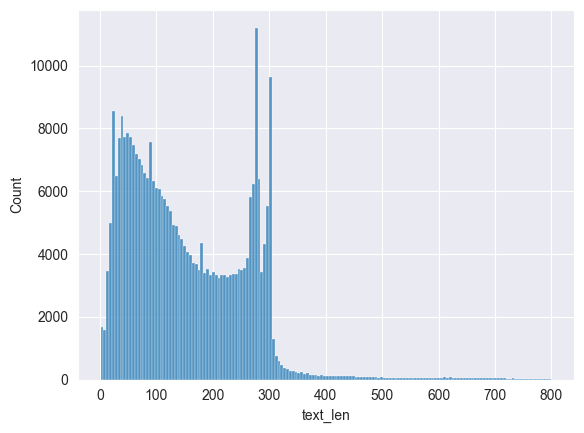

In [34]:
sns.histplot(raw.query("text_len <= 800"), x = "text_len")